# Colab

In [ ]:
!mkdir dataset
!unzip /content/drive/MyDrive/forest-type-classification-spai.zip
!mv metaData.csv dataset
!mv sample_submission.csv dataset
!mv test.csv dataset
!mv train.csv dataset

# Data

In [ ]:
import pandas as pd

df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
df_train

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,nforest_type
0,2002,293,1927,1038,278,475,453,987,1773,2184,1900,2343,3039,MDF
1,3212,197,1598,697,201,347,228,682,1982,2449,2254,2685,2690,DDF
2,13312,929,1975,1031,982,1020,856,1220,2051,2421,2392,2671,2683,MDF
3,17020,132,1560,689,189,408,175,609,2117,2907,3024,3005,2955,MDF
4,5967,241,1944,1131,362,538,487,918,1549,1844,1702,2077,2043,MDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,9185,374,1940,1054,382,565,498,977,1678,1929,2109,2291,2100,DDF
13049,13977,1983,3602,2720,1622,1782,1766,2314,3488,3900,3924,4097,6053,DDF
13050,755,940,2007,1148,975,1080,968,1252,1780,1983,1942,2247,2170,DDF
13051,1616,1174,2312,1190,1112,1126,889,1310,2511,3085,3050,3396,3380,MDF


In [ ]:
import numpy as np

def add_features(df_train):
  df_train['NDVI'] = (df_train['b8'] - df_train['b4']) / (df_train['b8'] + df_train['b4'])
  df_train['NDWI'] = (df_train['b8'] - df_train['b3']) / (df_train['b8'] + df_train['b3'])
  df_train['MSAVI'] = (2 * df_train['b8']) + 1 - np.sqrt(np.power((2 * df_train['b8'] + 1), 2) - 8 * (df_train['b8'] - df_train['b4'])) / 2
  df_train['EVI'] = 2.5 * (df_train['b8'] - df_train['b4']) / (df_train['b8'] + 6 * df_train['b4'] - 7.5 * df_train['b2'] + 1)
  return df_train

In [ ]:
import numpy as np


X = df_train.iloc[:, 1:-1]
y = df_train['nforest_type']

X = add_features(X)
df_test = add_features(df_test.iloc[:, 1:])

labels = y.unique()
ids = range(3)
label2id = dict(zip(labels, ids))
id2label = dict(zip(ids, labels))

y = y.values
X.shape, y.shape, y[:5]

((13053, 16),
 (13053,),
 array(['MDF', 'DDF', 'MDF', 'MDF', 'MDF'], dtype=object))

In [ ]:
X.shape

(13053, 19)

In [ ]:
X.describe()

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,NDVI,NDWI,MSAVI,EVI,h,s,v
count,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,1.305300e+04,1.305300e+04,13053.000000
mean,352.787482,1785.723742,894.546541,400.200414,578.862560,442.523481,896.518885,2056.567226,2512.113001,2585.021298,2803.391021,2811.173677,0.713994,0.640264,2586.343719,2.533003,7.200442e-01,5.733532e-01,0.508759
std,303.240789,336.070954,268.330211,311.052850,290.515207,293.689997,301.941588,363.296174,453.086623,497.488590,476.572456,427.575740,0.151987,0.131834,497.521684,42.506704,1.110266e-16,1.110266e-16,0.000000
min,0.000000,167.000000,65.000000,1.000000,98.000000,53.000000,138.000000,519.000000,669.000000,578.000000,639.000000,407.000000,0.030983,0.054210,579.276667,-1937.500000,7.200442e-01,5.733532e-01,0.508759
25%,181.000000,1530.000000,697.000000,220.000000,396.000000,247.000000,678.000000,1801.000000,2190.000000,2244.000000,2475.000000,2511.000000,0.637077,0.579892,2245.347565,1.993296,7.200442e-01,5.733532e-01,0.508759
50%,244.000000,1774.000000,853.000000,285.000000,488.000000,345.000000,819.000000,2030.000000,2483.000000,2547.000000,2779.000000,2786.000000,0.760232,0.679472,2548.151310,2.398205,7.200442e-01,5.733532e-01,0.508759
75%,402.000000,2012.000000,1046.000000,453.000000,684.000000,549.000000,1068.000000,2291.000000,2799.000000,2895.000000,3108.000000,3074.000000,0.828001,0.734157,2896.353174,2.664759,7.200442e-01,5.733532e-01,0.508759
max,2616.000000,4110.000000,4994.000000,2480.000000,2668.000000,2504.000000,3105.000000,3978.000000,4940.000000,4848.000000,5027.000000,8329.000000,0.925666,0.845619,4849.413358,2367.500000,7.200442e-01,5.733532e-01,0.508759


In [ ]:
df_test.describe()

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,NDVI,NDWI,MSAVI,EVI
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.00000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,8460.447250,343.724250,1755.175500,874.034000,391.90850,565.39575,431.263750,877.736750,2035.02250,2492.112500,2559.606000,2781.600750,2787.735250,0.718308,0.644729,2560.931934,2.618295
std,4936.655852,299.644676,337.635537,261.565846,307.53824,288.03911,289.160107,299.177487,364.30941,456.763612,497.337325,482.245033,424.100144,0.148606,0.129172,497.365923,30.588135
min,1.000000,0.000000,390.000000,196.000000,27.00000,115.00000,54.000000,206.000000,681.00000,857.000000,794.000000,922.000000,894.000000,0.110724,0.080119,795.389107,-561.428571
25%,4198.750000,177.000000,1499.000000,680.000000,217.00000,387.00000,242.000000,662.000000,1782.00000,2176.000000,2226.000000,2453.000000,2498.000000,0.641200,0.586547,2227.425411,2.021465
50%,8470.000000,236.000000,1738.000000,829.500000,283.00000,480.00000,336.000000,806.500000,2009.00000,2464.000000,2522.500000,2754.000000,2762.000000,0.763430,0.682155,2523.888785,2.401784
75%,12761.500000,391.000000,1983.250000,1026.000000,435.25000,660.00000,530.000000,1037.000000,2261.00000,2767.250000,2869.500000,3072.500000,3043.000000,0.829412,0.736907,2870.916955,2.673144
max,17052.000000,2245.000000,3855.000000,3174.000000,2438.00000,2554.00000,2402.000000,2928.000000,4286.00000,4807.000000,5019.000000,5133.000000,6253.000000,0.926282,0.844265,5020.443011,1597.500000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_train, y_test

(array(['DDF', 'MDF', 'MDF', ..., 'DDF', 'DDF', 'MDF'], dtype=object),
 array(['DDF', 'DEF', 'MDF', ..., 'DEF', 'MDF', 'DEF'], dtype=object))

## PCA

In [ ]:
import numpy as np
from sklearn.decomposition import FastICA

X_ica = X
ica = FastICA(n_components=1)

X_ica = ica.fit_transform(X_ica)
X['ica'] = X_ica
X

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,NDVI,NDWI,MSAVI,EVI,ica
0,293,1927,1038,278,475,453,987,1773,2184,1900,2343,3039,0.614960,0.600000,1901.261531,1.427585,0.878204
1,197,1598,697,201,347,228,682,1982,2449,2254,2685,2690,0.816277,0.733180,2255.398826,2.394233,0.496999
2,929,1975,1031,982,1020,856,1220,2051,2421,2392,2671,2683,0.472906,0.402110,2393.142092,23.414634,0.133633
3,132,1560,689,189,408,175,609,2117,2907,3024,3005,2955,0.890591,0.762238,3025.442121,2.680151,-0.556187
4,241,1944,1131,362,538,487,918,1549,1844,1702,2077,2043,0.555048,0.519643,1703.213806,1.590314,1.648855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,374,1940,1054,382,565,498,977,1678,1929,2109,2291,2100,0.617952,0.577412,2110.263826,1.803627,1.125564
13049,1983,3602,2720,1622,1782,1766,2314,3488,3900,3924,4097,6053,0.379262,0.375394,3925.049917,2.289898,-4.303252
13050,940,2007,1148,975,1080,968,1252,1780,1983,1942,2247,2170,0.334708,0.285242,1943.001480,5.553022,1.066954
13051,1174,2312,1190,1112,1126,889,1310,2511,3085,3050,3396,3380,0.548616,0.460728,3051.208491,120.055556,-1.399846


In [ ]:
df_test['ica'] = ica.transform(df_test)
df_test

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,NDVI,NDWI,MSAVI,EVI,ica
0,69,1425,693,312,524,376,847,1821,2356,2378,2611,2595,0.726943,0.638870,2379.341856,2.180828,0.531834
1,242,1514,691,343,522,324,718,1730,2178,2472,2359,2582,0.768240,0.651303,2473.368909,2.911358,0.647239
2,218,2354,1118,292,596,410,965,2586,3226,3371,3645,3149,0.783126,0.699521,3372.378359,2.032537,-1.608375
3,350,2013,1134,306,572,475,982,1754,1935,2275,2290,2345,0.654545,0.598174,2276.291172,1.589544,0.878504
4,185,1450,712,293,440,384,673,1487,1965,2213,2200,2193,0.704274,0.668300,2214.326447,1.970480,1.222228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,447,1686,811,425,661,441,958,2432,2891,2966,3126,3312,0.741121,0.635511,2967.351294,2.602556,-0.860746
3996,252,2694,1503,470,778,753,1294,2334,2656,2679,3212,2856,0.561189,0.549899,2680.218887,1.310918,-0.596252
3997,233,1486,618,249,409,260,699,2188,2831,3030,3086,3087,0.841945,0.762140,3031.414178,2.542684,-0.632105
3998,221,1840,774,245,441,231,703,2491,3453,3284,3762,3161,0.868563,0.763221,3285.429649,2.693665,-1.523512


In [ ]:
from sklearn.preprocessing import normalize

# X_norm = normalize(X_pca, norm="l1")  # L1 normalization each row independently
X_norm = normalize(X_pca, norm="l2")  # L2 normalization each row independently
X_norm -= np.min(X_norm)
X_norm /= np.max(X_norm)
X_norm

array([[0.01348678, 0.61534682],
       [0.13663934, 0.1565338 ],
       [0.4954717 , 0.99997951],
       ...,
       [0.23990887, 0.92702765],
       [0.90461238, 0.79374962],
       [0.95531175, 0.70661855]])

In [ ]:
this_X = X_ica
DDF_set = this_X[df_train['nforest_type']=='DDF']
MDF_set = this_X[df_train['nforest_type']=='MDF']
DEF_set = this_X[df_train['nforest_type']=='DEF']

In [ ]:
color_imgs = []
for r, g, b in DDF_set[:2500]:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

for r, g, b in DEF_set[:2500]:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

for r, g, b in MDF_set[:2500]:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

In [ ]:
img = np.array(color_imgs).reshape(75, 100, 3)

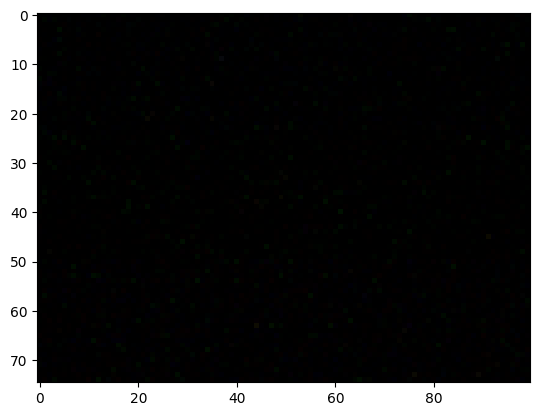

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

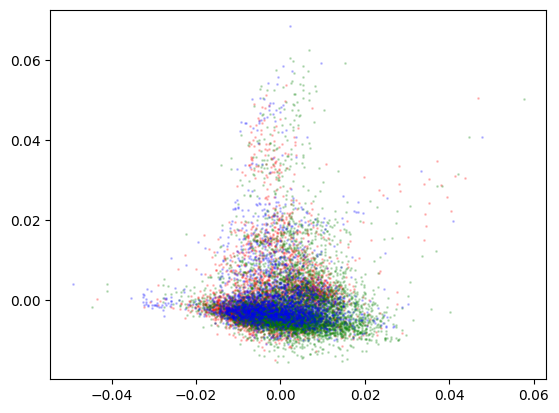

In [ ]:
# PCA2
size = 2
alpha=0.2
plt.plot(DDF_set[:, 0], DDF_set[:, 1], '.r', markersize=size, alpha=alpha)
plt.plot(MDF_set[:, 0], MDF_set[:, 1], '.g', markersize=size, alpha=alpha)
plt.plot(DEF_set[:, 0], DEF_set[:, 1], '.b', markersize=size, alpha=alpha)

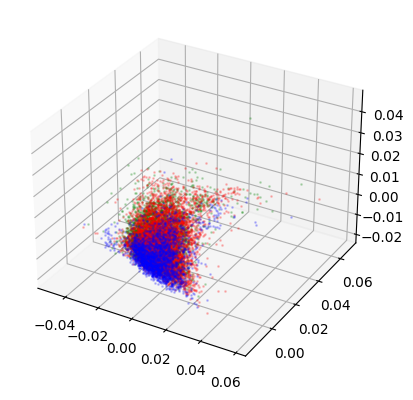

In [ ]:
# PCA3
fig = plt.figure()
ax = plt.axes(projection ='3d')
size = 2
alpha = 0.2
ax.plot3D(DDF_set[:, 0], DDF_set[:, 1], DDF_set[:, 2], '.g', markersize=size, alpha=alpha)
ax.plot3D(MDF_set[:, 0], MDF_set[:, 1], MDF_set[:, 2], '.r', markersize=size, alpha=alpha)
ax.plot3D(DEF_set[:, 0], DEF_set[:, 1], DEF_set[:, 2], '.b', markersize=size, alpha=alpha)

## Visualize

In [ ]:
this_X = X
DDF_set = this_X[df_train['nforest_type']=='DDF']
MDF_set = this_X[df_train['nforest_type']=='MDF']
DEF_set = this_X[df_train['nforest_type']=='DEF']

In [ ]:
def feature_rgb(df):
  b1 = df['b1'] / df['b1'].max() # coastal aerosol
  b4 = df['b4'] / df['b4'].max() # red
  b3 = df['b3'] / df['b3'].max() # green
  b2 = df['b2'] / df['b2'].max() # blue
  b5 = df['b5'] / df['b5'].max() # red edge
  b6 = df['b6'] / df['b6'].max() # red edge
  b7 = df['b7'] / df['b7'].max() # red edge <---------------- similar to b9
  b8 = df['b8'] / df['b8'].max() # nir <--------------- not confirm yet but I think forest in thailand have similar b8 value
  b8_a = df['b8_a'] / df['b8_a'].max() # narrow nir
  b9 = df['b9'] / df['b9'].max() # narrow nir <--------------- very good can seperate MDF from other
  b11 = df['b11'] / df['b11'].max() # swir
  b12 = df['b12'] / df['b12'].max() # swir


  # df['rgb'] = list(zip(b4 * b7 / b3, b8, b9))
  df['rgb'] = list(zip(b9, b12, b11))
  return df
DDF_set = feature_rgb(DDF_set)
MDF_set = feature_rgb(MDF_set)
DEF_set = feature_rgb(DEF_set)
X = feature_rgb(X)
df_test = feature_rgb(df_test)

/tmp/ipykernel_26183/1327288598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rgb'] = list(zip(b9, b12, b11))
/tmp/ipykernel_26183/1327288598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rgb'] = list(zip(b9, b12, b11))
/tmp/ipykernel_26183/1327288598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
color_imgs = []
for r, g, b in DDF_set['rgb'].values[:2500]:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

for r, g, b in DEF_set['rgb'].values[:2500]:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

for r, g, b in MDF_set['rgb'].values[:2500]:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

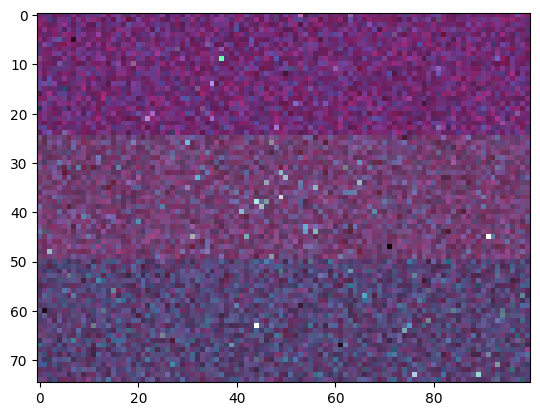

In [ ]:
import matplotlib.pyplot as plt

img = np.array(color_imgs).reshape(75, 100, 3)
plt.imshow(img)

In [ ]:
from matplotlib.colors import rgb_to_hsv
def feature_to_hsv(rgb, df):
  rgb = np.array(rgb)
  hsv = rgb_to_hsv(rgb)
  df['h'] = hsv[0]
  df['s'] = hsv[1]
  df['v'] = hsv[2]
X['rgb'].apply(feature_to_hsv, df=X)
df_test['rgb'].apply(feature_to_hsv, df=df_test)
df_test

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,...,b9,NDVI,NDWI,MSAVI,EVI,ica,rgb,h,s,v
0,69,1425,693,312,524,376,847,1821,2356,2378,...,2595,0.726943,0.638870,2379.341856,2.180828,0.531834,"(0.41500079961618425, 0.21833648393194707, 0.3...",0.870343,0.528831,0.420598
1,242,1514,691,343,522,324,718,1730,2178,2472,...,2582,0.768240,0.651303,2473.368909,2.911358,0.647239,"(0.41292179753718217, 0.21770636420919975, 0.3...",0.870343,0.528831,0.420598
2,218,2354,1118,292,596,410,965,2586,3226,3371,...,3149,0.783126,0.699521,3372.378359,2.032537,-1.608375,"(0.503598272829042, 0.352236925015753, 0.61063...",0.870343,0.528831,0.420598
3,350,2013,1134,306,572,475,982,1754,1935,2275,...,2345,0.654545,0.598174,2276.291172,1.589544,0.878504,"(0.37501999040460576, 0.3572778827977316, 0.52...",0.870343,0.528831,0.420598
4,185,1450,712,293,440,384,673,1487,1965,2213,...,2193,0.704274,0.668300,2214.326447,1.970480,1.222228,"(0.3507116584039661, 0.22432262129804661, 0.37...",0.870343,0.528831,0.420598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,447,1686,811,425,661,441,958,2432,2891,2966,...,3312,0.741121,0.635511,2967.351294,2.602556,-0.860746,"(0.5296657604349913, 0.25551354757403905, 0.43...",0.870343,0.528831,0.420598
3996,252,2694,1503,470,778,753,1294,2334,2656,2679,...,2856,0.561189,0.549899,2680.218887,1.310918,-0.596252,"(0.4567407644330721, 0.4735349716446125, 0.698...",0.870343,0.528831,0.420598
3997,233,1486,618,249,409,260,699,2188,2831,3030,...,3087,0.841945,0.762140,3031.414178,2.542684,-0.632105,"(0.4936830321445706, 0.1947069943289225, 0.385...",0.870343,0.528831,0.420598
3998,221,1840,774,245,441,231,703,2491,3453,3284,...,3161,0.868563,0.763221,3285.429649,2.693665,-1.523512,"(0.5055173516711978, 0.2438563327032136, 0.477...",0.870343,0.528831,0.420598


In [ ]:
X = X.drop('rgb', axis=1)
df_test = df_test.drop('rgb', axis=1)
df_test

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,NDVI,NDWI,MSAVI,EVI,ica,h,s,v
0,69,1425,693,312,524,376,847,1821,2356,2378,2611,2595,0.726943,0.638870,2379.341856,2.180828,0.531834,0.870343,0.528831,0.420598
1,242,1514,691,343,522,324,718,1730,2178,2472,2359,2582,0.768240,0.651303,2473.368909,2.911358,0.647239,0.870343,0.528831,0.420598
2,218,2354,1118,292,596,410,965,2586,3226,3371,3645,3149,0.783126,0.699521,3372.378359,2.032537,-1.608375,0.870343,0.528831,0.420598
3,350,2013,1134,306,572,475,982,1754,1935,2275,2290,2345,0.654545,0.598174,2276.291172,1.589544,0.878504,0.870343,0.528831,0.420598
4,185,1450,712,293,440,384,673,1487,1965,2213,2200,2193,0.704274,0.668300,2214.326447,1.970480,1.222228,0.870343,0.528831,0.420598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,447,1686,811,425,661,441,958,2432,2891,2966,3126,3312,0.741121,0.635511,2967.351294,2.602556,-0.860746,0.870343,0.528831,0.420598
3996,252,2694,1503,470,778,753,1294,2334,2656,2679,3212,2856,0.561189,0.549899,2680.218887,1.310918,-0.596252,0.870343,0.528831,0.420598
3997,233,1486,618,249,409,260,699,2188,2831,3030,3086,3087,0.841945,0.762140,3031.414178,2.542684,-0.632105,0.870343,0.528831,0.420598
3998,221,1840,774,245,441,231,703,2491,3453,3284,3762,3161,0.868563,0.763221,3285.429649,2.693665,-1.523512,0.870343,0.528831,0.420598


In [ ]:
y

array(['MDF', 'DDF', 'MDF', ..., 'DDF', 'MDF', 'MDF'], dtype=object)

In [ ]:
import torch
X = torch.tensor(X.values, dtype=torch.float32)
df_test = torch.tensor(df_test.values, dtype=torch.float32)

for key, value in label2id.items():
  y[y==key] = value
y = torch.tensor(y.astype(int), dtype=torch.float32)
X

tensor([[2.9300e+02, 1.9270e+03, 1.0380e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.9700e+02, 1.5980e+03, 6.9700e+02,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [9.2900e+02, 1.9750e+03, 1.0310e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        ...,
        [9.4000e+02, 2.0070e+03, 1.1480e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.1740e+03, 2.3120e+03, 1.1900e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.9300e+02, 2.0910e+03, 1.0840e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01]])

In [ ]:
import torch
torch.save(X, 'featuresdataset/X.pt')
torch.save(y, 'featuresdataset/y.pt')
torch.save(df_test, 'featuresdataset/test.pt')

## Reshape

In [ ]:
y

array([0, 1, 0, ..., 1, 0, 0], dtype=object)

In [ ]:
import torch
X = torch.tensor(X.values, dtype=torch.float32)
df_test = torch.tensor(df_test.values, dtype=torch.float32)

for key, value in label2id.items():
  y[y==key] = value
y = torch.tensor(y.astype(int), dtype=torch.float32)
X

tensor([[2.9300e+02, 1.9270e+03, 1.0380e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.9700e+02, 1.5980e+03, 6.9700e+02,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [9.2900e+02, 1.9750e+03, 1.0310e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        ...,
        [9.4000e+02, 2.0070e+03, 1.1480e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.1740e+03, 2.3120e+03, 1.1900e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.9300e+02, 2.0910e+03, 1.0840e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01]])

In [ ]:
p = X.size(0)
X = torch.reshape(X, (p, 1, 5, 4))

p = df_test.size(0)
test = torch.reshape(df_test, (p, 1, 5, 4))
X.size(), test.size()

(torch.Size([13053, 1, 5, 4]), torch.Size([4000, 1, 5, 4]))

In [ ]:
torch.save(X, 'imagedataset/X.pt')
torch.save(y, 'imagedataset/y.pt')
torch.save(test, 'imagedataset/test.pt')

# Model

## RF

accuracy_score:  0.6637303715051704
f1_score:  0.6648621400751601


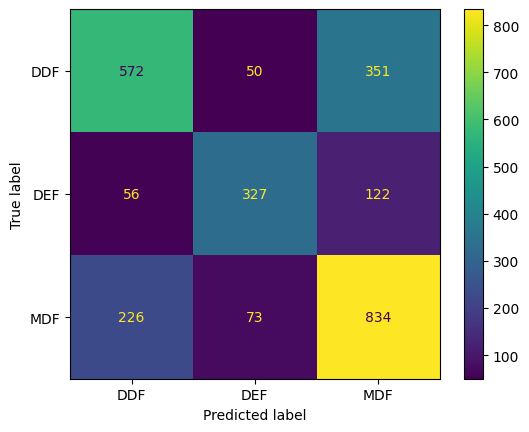

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

X_train_ = X_train.copy()
X_test_ = X_test.copy()
y_train_ = y_train.copy()
y_test_ = y_test.copy()

clf = RandomForestClassifier(max_depth=None, random_state=888, n_estimators=2000)
clf.fit(X_train_, y_train_)

y_pred = clf.predict(X_test_)
print('accuracy_score: ', accuracy_score(y_test_, y_pred))
print('f1_score: ', f1_score(y_test_, y_pred, average='macro'))
cm = confusion_matrix(y_test_, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

## kNN

100%|██████████| 49/49 [00:53<00:00,  1.09s/it]


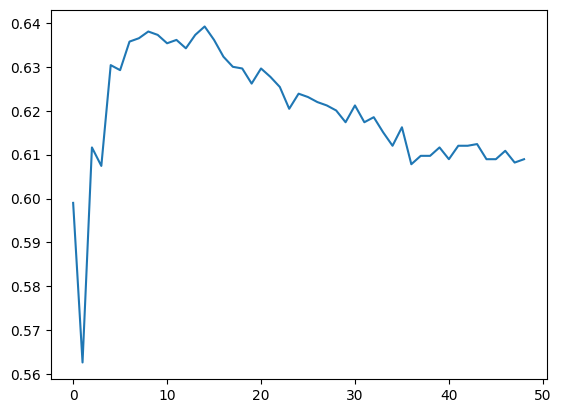

best k:  15
accuracy_score:  0.6924549980850249
f1_score:  0.6775541831698823


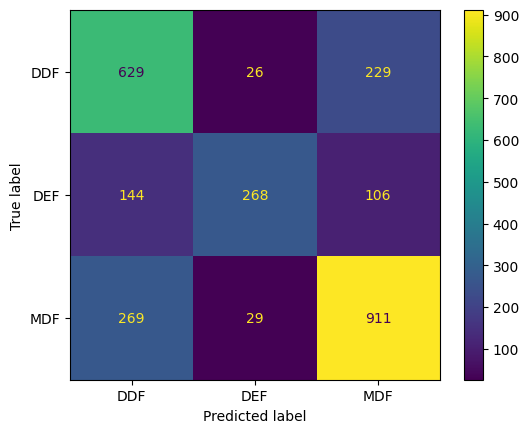

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

X_train_ = X_train.copy()
X_test_ = X_test.copy()
y_train_ = y_train.copy()
y_test_ = y_test.copy()

accs = []
for k in tqdm(range(1, 50)):

  neigh = KNeighborsClassifier(n_neighbors=k, p=1)
  neigh.fit(X_train_, y_train_)

  y_pred = neigh.predict(X_test_)
  acc = accuracy_score(y_test_, y_pred)
  accs.append(acc)

plt.plot(accs)
plt.show()

best_k = np.argmax(accs)+1
print('best k: ', best_k) # 11


neigh = KNeighborsClassifier(n_neighbors=best_k, p=1)
neigh.fit(X, y)

y_pred = neigh.predict(X_test_)
acc = accuracy_score(y_test_, y_pred)
print('accuracy_score: ', acc)
print('f1_score: ', f1_score(y_test_, y_pred, average='macro'))
cm = confusion_matrix(y_test_, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neigh.classes_)
disp.plot()

##kNN torch

accuracy_score:  0.5419379548065875
f1_score:  0.5371452498650385


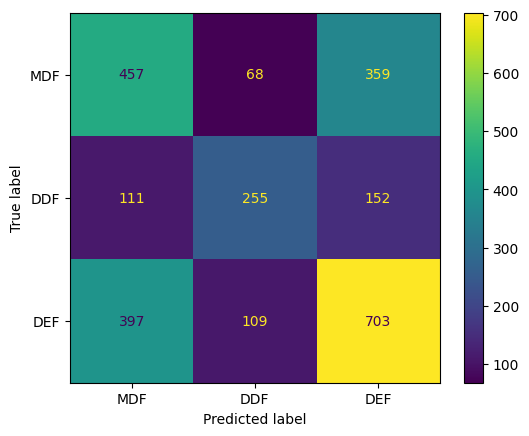

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

class kNN(nn.Module):
  def __init__(self, X, y, k):
    super().__init__()
    self.X = F.normalize(X, p=2, dim=-1).t()
    self.y = y
    self.k = k

  def forward(self, x):
    x = F.normalize(x, p=2, dim=-1)
    sim = torch.mm(x, self.X)
    _, indices = torch.topk(sim, self.k, -1)
    idx_mode =  torch.mode(indices, -1)[0]
    return self.y[idx_mode]


100%|██████████| 100/100 [00:32<00:00,  3.08it/s]


best k:  tensor(1)


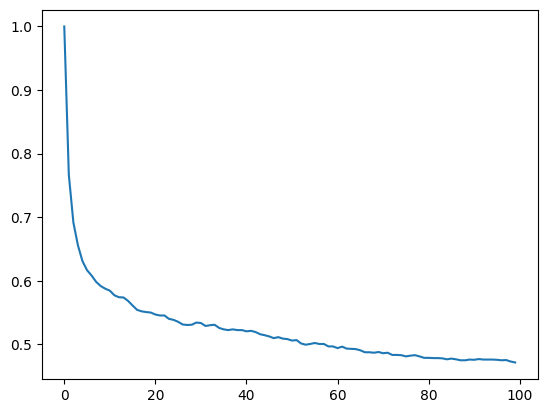

accuracy_score:  1.0
f1_score:  1.0


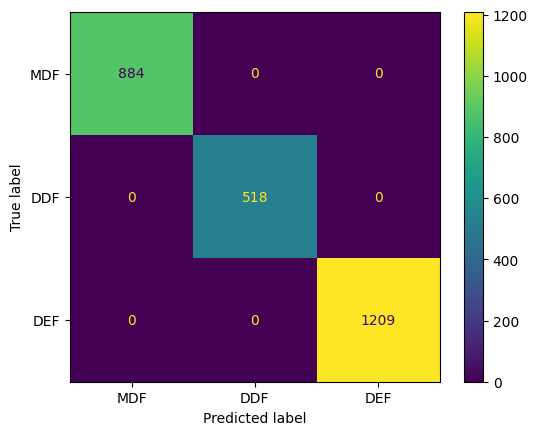

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

X_train_ = torch.tensor(X.copy().values, dtype=torch.float32)
X_test_ = torch.tensor(X_test.copy().values, dtype=torch.float32)
y_train_ = y.copy()
y_test_ = y_test.copy()

accs = []
for k in tqdm(range(1, 101)):
  ckNN = kNN(X_train_, y_train_, k)
  y_pred = ckNN(X_test_)
  acc = accuracy_score(y_test_, y_pred)
  accs.append(acc)

accs = torch.tensor(accs)
best_k = torch.argmax(accs, -1)+1
print('best k: ', best_k)

plt.plot(accs)
plt.show()

ckNN = kNN(X_train_, y_train_, best_k)
y_pred = ckNN(X_test_)
acc = accuracy_score(y_test_, y_pred)
print('accuracy_score: ', acc)
print('f1_score: ', f1_score(y_test_, y_pred, average='macro'))
cm = confusion_matrix(y_test_, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(id2label.values()))
disp.plot()

## XGB

In [ ]:
import xgboost as xgb

X_train_ = X_train
X_test_ = X_test
y_train_ = y_train
y_test_ = y_test

torch.reshape()

for key, value in label2id.items():
  y_train_[y_train_==key] = value
  y_test_[y_test_==key] = value

device: str = "cpu"
params4 = {
    "learning_rate": 0.1,
    "max_depth": None,
    "colsample_bytree": 0.79,
    "colsample_bynode": 0.79,
    "reg_alpha": 2,
    "device": device,
    "reg_lambda": 10,
    "n_estimators": 5000,
    "random_state": 888,
    # "eval_metric": "auc",
}
xgb_model = xgb.XGBClassifier(**params4)
xgb_model.fit(X_train_, y_train_)
# fitted_models_lgb.append(xgb_model)



ValueError: Please reshape the input data into 2-dimensional matrix.

ACC Score: 0.6748372271160475


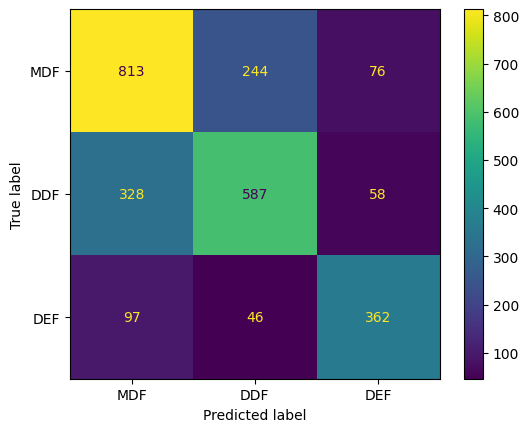

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

y_pred = xgb_model.predict(X_test_)
acc_score = accuracy_score(y_test_.astype(int), y_pred)
print("ACC Score:", acc_score)

cm = confusion_matrix(y_test_.astype(int), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()

## Transformer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Tranformers(nn.Module):
  def __init__(self, in_features, out_features, d_model, nhead):
    super().__init__()
    self.norm = nn.LayerNorm(in_features)
    self.linear = nn.Linear(in_features, d_model)
    self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True, dropout=0.5)
    self.classify = nn.Sequential(
        nn.Linear(d_model, d_model*2),
        nn.ReLU(),
        nn.Linear(d_model*2, d_model),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(d_model, d_model//2),
        nn.ReLU(),
        nn.Linear(d_model//2, out_features),
        nn.Tanh(),
    )

  def forward(self, x):
    x = self.norm(x)
    x = self.linear(x)
    x = self.encoder_layer(x)
    x = self.classify(x)
    return x

sample = torch.rand(100, 16)
model = Tranformers(16, 3, 512, 1)
out = model(sample)
out.shape

torch.Size([100, 3])

In [ ]:
from torch import optim
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train_ = torch.tensor(X_train.copy().values, dtype=torch.float32)
X_test_ = torch.tensor(X_test.copy().values, dtype=torch.float32)
y_train_ = y_train.copy()
y_test_ = y_test.copy()

for key, value in label2id.items():
  y_train_[y_train_==key] = value
  y_test_[y_test_==key] = value

y_train_ = torch.tensor(y_train_.astype(int))
y_test_ = torch.tensor(y_test_.astype(int))

# optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

model.to(device)

print('Start Training!')
loop = tqdm(range(1, 10000+1), leave=True)
for epoch in loop:
  torch.cuda.empty_cache()

  model.train()
  X_train_ = X_train_.to(device)
  y_train_ = y_train_.to(device)
  out = model(X_train_)
  loss = loss_fn(out, y_train_)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  y_pred_train = torch.argmax(out, -1)
  train_acc_score = accuracy_score(y_train_.cpu().detach().numpy(), y_pred_train.cpu().detach().numpy())

  model.eval()
  with torch.no_grad():
    X_test_ = X_test_.to(device)
    y_test_ = y_test_.to(device)
    val_out = model(X_test_)
    val_loss = loss_fn(val_out, y_test_)

    y_pred = torch.argmax(val_out, -1)
    acc_score = accuracy_score(y_test_.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
    loop.set_postfix(loss=loss.item(), val_loss=val_loss.item(), val_acc=acc_score, acc=train_acc_score)

Start Training!


100%|██████████| 10000/10000 [12:31<00:00, 13.31it/s, acc=0.717, loss=0.679, val_acc=0.656, val_loss=0.763]


## MLP

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AE(nn.Module):
  def __init__(self, in_features):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(in_features, 64),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 256),
        nn.Linear(256, 512),
        nn.Linear(512, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.Linear(512, 256),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.Linear(64, 32),
        nn.Linear(32, 3),
        nn.Tanh(),
    )

  def forward(self, x):
    x = self.encoder(x)
    return x

model = AE(16)
sample = torch.rand(100, 16)
out = model(sample)
out.shape

torch.Size([100, 3])

In [ ]:
from torch import optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score

device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train_ = torch.tensor(X.copy().values, dtype=torch.float32)
X_test_ = torch.tensor(X_test.copy().values, dtype=torch.float32)
y_train_ = y.copy()
y_test_ = y_test.copy()

for key, value in label2id.items():
  y_train_[y_train_==key] = value
  y_test_[y_test_==key] = value

y_train_ = torch.tensor(y_train_.astype(int))
y_test_ = torch.tensor(y_test_.astype(int))

optimizer = optim.AdamW(model.parameters(), lr=3e-7)
loss_fn = nn.CrossEntropyLoss()

model.to(device)

print('Start Training!')
loop = tqdm(range(1, 20000+1), leave=True)
for epoch in loop:
  torch.cuda.empty_cache()

  model.train()
  X_train_ = X_train_.to(device)
  y_train_ = y_train_.to(device)
  out = model(X_train_)
  loss = loss_fn(out, y_train_)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  y_pred_train = torch.argmax(out, -1)
  train_acc_score = accuracy_score(y_train_.cpu().detach().numpy(), y_pred_train.cpu().detach().numpy())

  model.eval()
  with torch.no_grad():
    X_test_ = X_test_.to(device)
    y_test_ = y_test_.to(device)
    val_out = model(X_test_)
    val_loss = loss_fn(val_out, y_test_)

    y_pred = torch.argmax(val_out, -1)
    acc_score = accuracy_score(y_test_.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
    loop.set_postfix(loss=loss.item(), val_loss=val_loss.item(), val_acc=acc_score, acc=train_acc_score)

Start Training!


100%|██████████| 20000/20000 [13:41<00:00, 24.34it/s, acc=0.762, loss=0.602, val_acc=0.772, val_loss=0.608]


## CNN

In [ ]:
import torch
torch.cuda.empty_cache()
!nvidia-smi

Thu Jun  6 20:35:59 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   36C    P0    49W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Main Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, padding):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(in_channels),
            nn.GELU(),
            nn.Dropout2d(0.3),
            nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(in_channels),
            nn.GELU(),
        )

        self.out = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(out_channels),
        )

    def forward(self, x):
        y = self.cnn(x)
        y += x
        y = self.out(y)

        return y


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import kan
# import torchvision.transforms as T

# class KANBlock(nn.Module):
#     def __init__(self, in_features, out_features):
#         super().__init__()
#         self.kan_layer = kan.KANLayer(in_features, out_features,device='cuda')

#     def forward(self, x):
#       y, _, _, _ = self.kan_layer(x)
#       return y


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from kan import KANLayer
import torchvision.transforms as T

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.super_res2 = ResidualBlock(1, 8, 3, 1)
    self.super_res3 = ResidualBlock(1, 16, 3, 1)
    self.super_res4 = ResidualBlock(1, 32, 3, 1)
    self.super_res5 = ResidualBlock(1, 64, 3, 1)

    self.res1 = nn.Sequential(
        ResidualBlock(1, 3, 3, 1),
        ResidualBlock(3, 3, 3, 1),
    )
    self.res2 = nn.Sequential(
        ResidualBlock(3, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
    )
    self.res3 = nn.Sequential(
        ResidualBlock(8, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
    )
    self.res4 = nn.Sequential(
        ResidualBlock(16, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
    )
    self.res5 = nn.Sequential(
        ResidualBlock(32, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
    )
    self.flatten = nn.Flatten()
    self.classify = nn.Sequential(
        nn.Linear(1280, 512),
        nn.Linear(512, 256),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(256, 128),
        nn.Linear(128, 64),
        nn.Linear(64, 32),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(32, 16),
        nn.Linear(16, 16),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(16, 3),
        nn.Softmax(-1),
    )

  def forward(self, x):
    x_2 = self.super_res2(x)
    x_3 = self.super_res3(x)
    x_4 = self.super_res4(x)
    x_5 = self.super_res5(x)

    x = self.res1(x)
    x = self.res2(x) + x_2
    x = self.res3(x) + x_3
    x = self.res4(x) + x_4
    x = self.res5(x) + x_5
    x = self.flatten(x)
    x = self.classify(x)
    return x

model = CNN()
sample = torch.rand(100, 1, 5, 4)
out = model(sample)
out.shape

torch.Size([100, 3])

In [ ]:
import torchsummary
torchsummary.summary(model)

Layer (type:depth-idx)                   Param #
├─ResidualBlock: 1-1                     --
|    └─Sequential: 2-1                   --
|    |    └─Conv2d: 3-1                  10
|    |    └─BatchNorm2d: 3-2             2
|    |    └─GELU: 3-3                    --
|    |    └─Dropout2d: 3-4               --
|    |    └─Conv2d: 3-5                  10
|    |    └─BatchNorm2d: 3-6             2
|    |    └─GELU: 3-7                    --
|    └─Sequential: 2-2                   --
|    |    └─Conv2d: 3-8                  80
|    |    └─BatchNorm2d: 3-9             16
├─ResidualBlock: 1-2                     --
|    └─Sequential: 2-3                   --
|    |    └─Conv2d: 3-10                 10
|    |    └─BatchNorm2d: 3-11            2
|    |    └─GELU: 3-12                   --
|    |    └─Dropout2d: 3-13              --
|    |    └─Conv2d: 3-14                 10
|    |    └─BatchNorm2d: 3-15            2
|    |    └─GELU: 3-16                   --
|    └─Sequential: 2-4         

Layer (type:depth-idx)                   Param #
├─ResidualBlock: 1-1                     --
|    └─Sequential: 2-1                   --
|    |    └─Conv2d: 3-1                  10
|    |    └─BatchNorm2d: 3-2             2
|    |    └─GELU: 3-3                    --
|    |    └─Dropout2d: 3-4               --
|    |    └─Conv2d: 3-5                  10
|    |    └─BatchNorm2d: 3-6             2
|    |    └─GELU: 3-7                    --
|    └─Sequential: 2-2                   --
|    |    └─Conv2d: 3-8                  80
|    |    └─BatchNorm2d: 3-9             16
├─ResidualBlock: 1-2                     --
|    └─Sequential: 2-3                   --
|    |    └─Conv2d: 3-10                 10
|    |    └─BatchNorm2d: 3-11            2
|    |    └─GELU: 3-12                   --
|    |    └─Dropout2d: 3-13              --
|    |    └─Conv2d: 3-14                 10
|    |    └─BatchNorm2d: 3-15            2
|    |    └─GELU: 3-16                   --
|    └─Sequential: 2-4         

###Smodel

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, padding):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(in_channels),
            nn.GELU(),
            nn.Dropout2d(0.3),
            nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(in_channels),
            nn.GELU(),
        )

        self.out = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(out_channels),
        )

    def forward(self, x):
        y = self.cnn(x)
        y += x
        y = self.out(y)

        return y


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# from kan import KANLayer
import torchvision.transforms as T

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.super_res1 = ResidualBlock(1, 1, 3, 1)
    self.super_res2 = ResidualBlock(1, 8, 3, 1)
    self.super_res3 = ResidualBlock(1, 16, 3, 1)
    self.super_res4 = ResidualBlock(1, 32, 3, 1)
    self.super_res5 = ResidualBlock(1, 32, 3, 1)

    self.res1 = nn.Sequential(
        ResidualBlock(1, 3, 3, 1),
        ResidualBlock(3, 3, 3, 1),
    )

    self.res1_3 = ResidualBlock(3, 16, 3, 1)
    self.res1_4 = ResidualBlock(3, 32, 3, 1)

    self.res2 = nn.Sequential(
        ResidualBlock(3, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
    )
    self.res2_final = ResidualBlock(8, 8, 3, 1)
    self.classify2 = nn.Sequential(
        nn.Linear(160, 64),
        nn.BatchNorm1d(64),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(64, 3),
        nn.Softmax(-1),
    )
    self.res2_4 = ResidualBlock(8, 32, 3, 1)
    self.res2_5 = ResidualBlock(8, 32, 3, 1)


    self.res3 = nn.Sequential(
        ResidualBlock(8, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
    )
    self.res3_final = ResidualBlock(16, 16, 3, 1)
    self.classify3 = nn.Sequential(
        nn.Linear(320, 128),
        nn.BatchNorm1d(128),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(128, 3),
        nn.Softmax(-1),
    )
    self.res3_5 = ResidualBlock(16, 32, 3, 1)

    self.res4 = nn.Sequential(
        ResidualBlock(16, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
    )
    self.res4_final = ResidualBlock(32, 32, 3, 1)
    self.classify4 = nn.Sequential(
        nn.Linear(640, 256),
        nn.BatchNorm1d(256),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(256, 3),
        nn.Softmax(-1),
    )

    self.res5 = nn.Sequential(
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
    )
    self.res5_final = ResidualBlock(32, 32, 3, 1)

    self.flatten = nn.Flatten()
    self.linear1 = nn.Sequential(
        nn.Linear(660, 256),
        nn.BatchNorm1d(256),
        nn.GELU(),
        nn.Dropout(0.2),
    )
    self.linear2 = nn.Sequential(
        nn.Linear(256, 64),
        nn.BatchNorm1d(64),
        nn.GELU(),
        nn.Dropout(0.2),
    )
    self.classify5_1 = nn.Sequential(
        nn.Linear(256, 3),
        nn.Softmax(-1),
    )
    self.classify5_2 = nn.Sequential(
        nn.Linear(64, 3),
        nn.Softmax(-1),
    )

  def forward(self, x):
    ys = []
    pure_x = x
    x_1 = self.super_res1(x)
    x_2 = self.super_res2(x)
    x_3 = self.super_res3(x)
    x_4 = self.super_res4(x)
    x_5 = self.super_res5(x)

    x = self.res1(x)

    x1_3 = self.res1_3(x)
    x1_4 = self.res1_4(x)

    x = self.res2(x) + x_2
    x = self.res2_final(x)
    y2 = self.flatten(x)
    y2 = self.classify2(y2)
    ys.append(y2)

    x2_4 = self.res2_4(x)
    x2_5 = self.res2_5(x)

    x = self.res3(x) + x_3 + x1_3
    x = self.res3_final(x)
    y3 = self.flatten(x)
    y3 = self.classify3(y3)
    ys.append(y3)

    x3_5 = self.res3_5(x)

    x = self.res4(x) + x_4 + x1_4 + x2_4
    x = self.res4_final(x)
    y4 = self.flatten(x)
    y4 = self.classify4(y4)
    ys.append(y4)

    x = self.res5(x) + x_5 + x2_5 + x3_5
    x = self.res5_final(x)
    x = torch.cat([x, x_1 + pure_x], 1)

    x = self.flatten(x)
    l1 = self.linear1(x)
    l2 = self.linear2(l1)
    y5_1 = self.classify5_1(l1)
    y5_2 = self.classify5_2(l2)
    ys.append(y5_1)
    ys.append(y5_2)
    return torch.stack(ys)

model = CNN()
sample = torch.rand(100, 1, 5, 4)
out = model(sample)
out.size()

torch.Size([5, 100, 3])

In [ ]:
import torchsummary
torchsummary.summary(model, input_size=(1, 5, 4))

Layer (type:depth-idx)                   Param #
├─ResidualBlock: 1-1                     --
|    └─Sequential: 2-1                   --
|    |    └─Conv2d: 3-1                  10
|    |    └─BatchNorm2d: 3-2             2
|    |    └─GELU: 3-3                    --
|    |    └─Dropout2d: 3-4               --
|    |    └─Conv2d: 3-5                  10
|    |    └─BatchNorm2d: 3-6             2
|    |    └─GELU: 3-7                    --
|    └─Sequential: 2-2                   --
|    |    └─Conv2d: 3-8                  10
|    |    └─BatchNorm2d: 3-9             2
├─ResidualBlock: 1-2                     --
|    └─Sequential: 2-3                   --
|    |    └─Conv2d: 3-10                 10
|    |    └─BatchNorm2d: 3-11            2
|    |    └─GELU: 3-12                   --
|    |    └─Dropout2d: 3-13              --
|    |    └─Conv2d: 3-14                 10
|    |    └─BatchNorm2d: 3-15            2
|    |    └─GELU: 3-16                   --
|    └─Sequential: 2-4          

Layer (type:depth-idx)                   Param #
├─ResidualBlock: 1-1                     --
|    └─Sequential: 2-1                   --
|    |    └─Conv2d: 3-1                  10
|    |    └─BatchNorm2d: 3-2             2
|    |    └─GELU: 3-3                    --
|    |    └─Dropout2d: 3-4               --
|    |    └─Conv2d: 3-5                  10
|    |    └─BatchNorm2d: 3-6             2
|    |    └─GELU: 3-7                    --
|    └─Sequential: 2-2                   --
|    |    └─Conv2d: 3-8                  10
|    |    └─BatchNorm2d: 3-9             2
├─ResidualBlock: 1-2                     --
|    └─Sequential: 2-3                   --
|    |    └─Conv2d: 3-10                 10
|    |    └─BatchNorm2d: 3-11            2
|    |    └─GELU: 3-12                   --
|    |    └─Dropout2d: 3-13              --
|    |    └─Conv2d: 3-14                 10
|    |    └─BatchNorm2d: 3-15            2
|    |    └─GELU: 3-16                   --
|    └─Sequential: 2-4          

### Train

In [ ]:
X = torch.load('imagedataset/X.pt')
y = torch.load('imagedataset/y.pt')
test = torch.load('imagedataset/test.pt')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
train_losses = []
val_losses =  []
train_accses =  [[] for i in range(5)]
val_accses =  [[] for i in range(5)]

use code below and train 1)4e-4, 5000 2)5e-5, 5000 3)6e-6, 2000

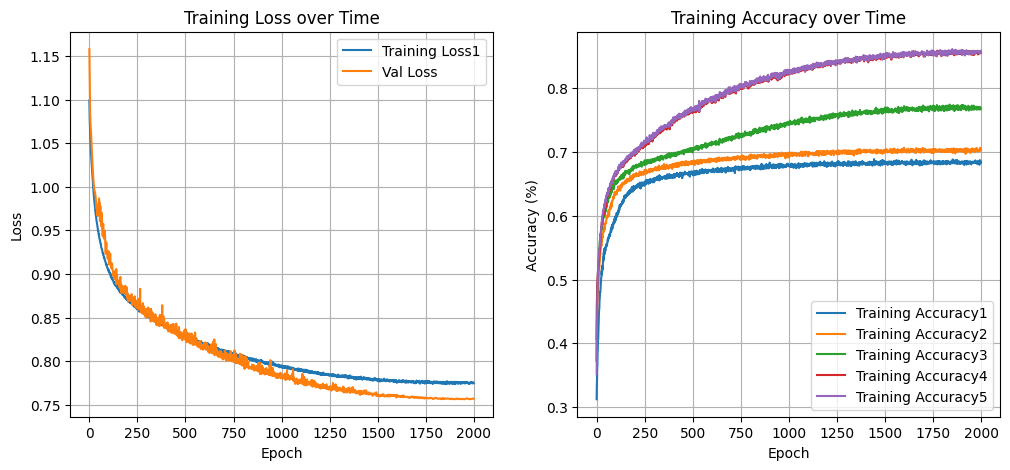

100%|██████████| 2000/2000 [09:53<00:00,  3.37it/s, acc=0.856, loss=0.775, lr=[8e-06], val_acc=0.89, val_loss=0.757]


In [ ]:
from torch import optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
from IPython.display import clear_output

device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train_ = X
X_test_ = X_test
y_train_ = y
y_test_ = y_test

y_train_ = y_train_.type(torch.LongTensor)
y_test_ = y_test_.type(torch.LongTensor)

# for key, value in label2id.items():
#   y_train_[y_train_==key] = value
#   y_test_[y_test_==key] = value

# y_train_ = torch.tensor(y_train_.astype(int))
# y_test_ = torch.tensor(y_test_.astype(int))

# scaler = torch.cuda.amp.GradScaler()

EPOCH = 2000

optimizer = optim.AdamW(model.parameters(), lr=4e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=EPOCH, eta_min=8e-6)
loss_fn = nn.CrossEntropyLoss()

model.to(device)

print('Start Training!')
loop = tqdm(range(1, EPOCH+1), leave=True)
for epoch in loop:
  torch.cuda.empty_cache()

  model.train()
  X_train_ = X_train_.to(device)
  y_train_ = y_train_.to(device)
  out = model(X_train_)

  en = out.size(0)
  loss = loss_fn(out[0], y_train_) / en
  y_pred_train = torch.argmax(out[0], -1)
  train_accses[0].append(accuracy_score(y_train_.cpu().detach().numpy(), y_pred_train.cpu().detach().numpy()))
  for i in range(1, en):
    loss += loss_fn(out[i], y_train_) / en
    y_pred_train = torch.argmax(out[i], -1)
    train_accses[i].append(accuracy_score(y_train_.cpu().detach().numpy(), y_pred_train.cpu().detach().numpy()))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # scaler.scale(loss).backward()
  # scaler.step(optimizer)
  # scaler.update()
  scheduler.step()

  train_losses.append(loss.item())

  model.eval()
  with torch.no_grad():
    X_test_ = X_test_.to(device)
    y_test_ = y_test_.to(device)

    val_out = model(X_test_)
    en = val_out.size(0)
    val_loss = loss_fn(val_out[0], y_test_) / en
    y_pred_val = torch.argmax(val_out[0], -1)
    val_accses[0].append(accuracy_score(y_test_.cpu().detach().numpy(), y_pred_val.cpu().detach().numpy()))
    for i in range(1, en):
      val_loss += loss_fn(val_out[i], y_test_) / en
      y_pred_val = torch.argmax(val_out[i], -1)
      val_accses[i].append(accuracy_score(y_test_.cpu().detach().numpy(), y_pred_val.cpu().detach().numpy()))

    val_losses.append(val_loss.item())

    loop.set_postfix(loss=loss.item(), val_loss=val_loss.item(), val_acc=val_accses[-1][-1], acc=train_accses[-1][-1], lr=scheduler.get_last_lr())

    if epoch % 100 == 0:
      clear_output(wait=True)
      plt.figure(figsize=(12, 5))

      plt.subplot(1, 2, 1)
      plt.plot(train_losses, label='Training Loss1')
      plt.plot(val_losses, label='Val Loss')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.title('Training Loss over Time')
      plt.legend()
      plt.grid()

      plt.subplot(1, 2, 2)
      for i in range(en):
        plt.plot(train_accses[i], label=f'Training Accuracy{i+1}')
        # plt.plot(val_accses[i], label=f'Val Accuracy{i+1}')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy (%)')
      plt.title('Training Accuracy over Time')
      plt.legend()
      plt.grid()

      plt.show()

In [ ]:
len(train_accses[0])

13

In [ ]:
torch.save(model, 'TESTMHMLP.pt')

In [ ]:
train_accs[2000]

0.8800275798666973

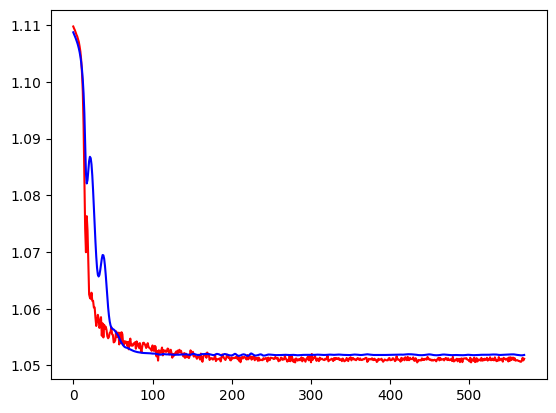

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, 'r')
plt.plot(val_losses, 'b')

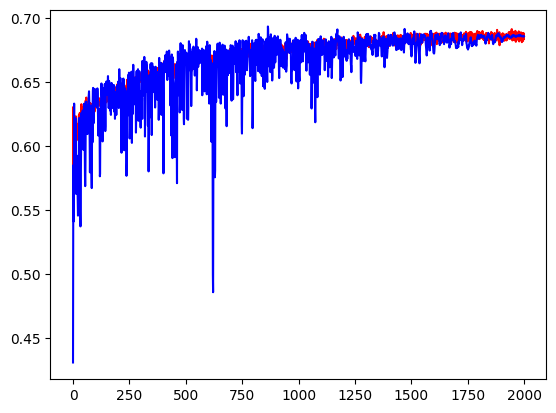

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_accs, 'r')
plt.plot(val_accs, 'b')

## CatBoost

In [ ]:
# Load dataset
import torch
X = torch.load('featuresdataset/X.pt').numpy()
y = torch.load('featuresdataset/y.pt').numpy()
test = torch.load('featuresdataset/test.pt').numpy()

In [ ]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import optuna
import catboost as cb
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

torch.cuda.empty_cache()

def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'depth': trial.suggest_int('depth', 4, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_uniform('random_strength', 0, 10),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50),
    }

    # Initialize CatBoost model
    model = cb.CatBoostClassifier(
        **params,
        task_type='GPU',
        verbose=0
    )

    # Train the model
    model.fit(X, y)

    # Predict on the test set
    y_pred = model.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)

    return accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the study
study.optimize(objective, n_trials=50)

# Print best trial
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-06-05 23:24:58,737] A new study created in memory with name: no-name-6c1f6050-5efb-45a4-86fa-66119cc3f780
/tmp/ipykernel_30912/1277432365.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
/tmp/ipykernel_30912/1277432365.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
/tmp/ipykernel_30912/1277432365.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.sug

Number of finished trials: 50
Best trial: {'iterations': 980, 'depth': 7, 'learning_rate': 0.21388087940162168, 'l2_leaf_reg': 0.0002494521615105419, 'border_count': 155, 'random_strength': 5.370890945145614, 'bagging_temperature': 0.6444186052329343, 'od_type': 'IncToDec', 'od_wait': 43}


Final accuracy: 1.0


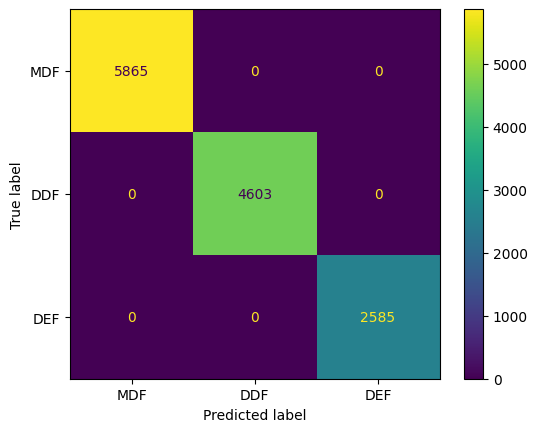

In [ ]:
# Train final model with best parameters
best_params = study.best_trial.params
best_model = cb.CatBoostClassifier(
    **best_params,
    task_type='GPU',
    verbose=0
)

best_model.fit(X, y)
y_pred = best_model.predict(X)
final_accuracy = accuracy_score(y, y_pred)
print(f'Final accuracy: {final_accuracy}')
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(id2label.values()))
disp.plot()

# Submit

In [ ]:
predict = model(test.to(device))
# predict = torch.argmax(predict, -1)
predict.size()

torch.Size([6, 4000, 3])

In [ ]:
predict = torch.reshape(4000, 2, 3)
predict.size()

torch.Size([4000, 2, 3])

In [ ]:
# predict = torch.argmax(torch.mean(predict, 0), -1).cpu().detach().numpy().astype(object)
predict = torch.argmax(predict[-1], -1).cpu().detach().numpy().astype(object)
predict = predict.astype(object)
for key, value in id2label.items():
  predict[predict==key] = value

predict

array(['DEF', 'DDF', 'MDF', ..., 'DDF', 'MDF', 'DEF'], dtype=object)

In [ ]:
predict = predict.reshape(4000)
predict

array(['DEF', 'MDF', 'MDF', ..., 'DDF', 'MDF', 'DEF'], dtype=object)

In [ ]:
# df_test['predict'] = predict
# df_answer = df_test[['id', 'predict']]
# df_answer

,id,predict
0,13467,DEF
1,12719,MDF
2,1054,MDF
3,13747,DDF
4,9453,DDF
...,...,...
3995,115,MDF
3996,10654,MDF
3997,5718,DDF
3998,13054,MDF


In [ ]:
df_submit = pd.read_csv('dataset/sample_submission.csv')
df_submit

,id,nforest_type
0,13467,DEF
1,12719,DDF
2,1054,MDF
3,13747,NaN
4,9453,NaN
...,...,...
3995,115,NaN
3996,10654,NaN
3997,5718,NaN
3998,13054,NaN


In [ ]:
df_submit['nforest_type'] = predict
df_submit

,id,nforest_type
0,13467,DEF
1,12719,DDF
2,1054,MDF
3,13747,DDF
4,9453,DEF
...,...,...
3995,115,DEF
3996,10654,MDF
3997,5718,DDF
3998,13054,MDF


In [ ]:
df_submit['nforest_type'].iloc[1] = 'DDF'
df_submit

/tmp/ipykernel_19413/3321173386.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_submit['nforest_type'].iloc[1] = 'DDF'
/tmp/ipykernel_19413/3321173386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,id,nforest_type
0,13467,DEF
1,12719,DDF
2,1054,MDF
3,13747,DDF
4,9453,DEF
...,...,...
3995,115,DEF
3996,10654,MDF
3997,5718,DDF
3998,13054,MDF


In [ ]:
df_submit.to_csv('submissionLowDenseCatMHMLP6a.csv', index=False)